In [1]:
### %matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [2]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

#case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-Control-062321','gfdl.ncrc4-intel16-prod'
case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-012322','gfdl.ncrc4-intel16-prod'
case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-013022','gfdl.ncrc4-intel19-prod'


In [3]:
phyto_varlist = ['di', 'smp', 'lgp']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [4]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022


In [233]:
# yrs=['1952']
# mmdd='0101'
# tar_path=os.path.join(path_root, case, machine_target, 'history')
# files=[glob(os.path.join(tar_path,yr)+'*.nc.tar')[0] for yr in yrs]
# print(files)

['/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/history/19520101.nc.tar']


In [6]:
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1948-1952'

files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension

if not files:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    files=sorted([f for fi in files for f in fi]) # nested list comprehension

print(files)

['/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/pp/ocean_cobalt_fdet_100/av/monthly_5yr/ocean_cobalt_fdet_100.1948-1952.01.nc', '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/pp/ocean_cobalt_fdet_100/av/monthly_5yr/ocean_cobalt_fdet_100.1948-1952.02.nc', '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/pp/ocean_cobalt_fdet_100/av/monthly_5yr/ocean_cobalt_fdet_100.1948-1952.03.nc', '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/pp/ocean_cobalt_fdet_100/av/monthly_5yr/ocean_cobalt_fdet_100.1948-1952.04.nc', '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/pp/ocean_cobalt_fdet_100/av/monthly_5yr/ocean_cobalt_fdet_100.1948-1952.05.nc', '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.

In [8]:
grid_file=os.path.join(path_root, case, machine_target, 'pp')+'/ocean_annual/ocean_annual.static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [9]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})
ds.depth_levels

<xarray.DataArray 'depth_levels' (z_l: 35)>
array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Thickness of depth bin
    units:      meters

In [234]:
FORCE_EXTRACT=False

for i,yr in enumerate(yrs):
    tmp_prefix=tmpdir+'/'+yr+mmdd
    test_file=tmp_prefix+'.ocean_cobalt_omip_tracers_month_z.nc'
    
    if not os.path.isfile(test_file) or FORCE_EXTRACT:
        print('extracting: '+files[i])
        [subprocess.call(['dmget', f]) for f in files]
        tarfile.open(files[i]).extractall(path=tmpdir)
    else:
        print('already extracted: '+files[i])
        
    files_in_dir=glob(tmp_prefix+'*.nc')
    #files_in_dir

extracting: /archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT/OM4p5_CORE2_IAF_gzCOBALT-013022/gfdl.ncrc4-intel19-prod/history/19520101.nc.tar


In [235]:
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 
open_files = [tmpdir+'/'+yr+mmdd+'.'+x+'.nc' for yr in yrs for x in diagTypes]
grid_file=tmpdir+'/'+yr+mmdd+'.ocean_static.nc'
ds=xr.open_mfdataset(open_files, combine='by_coords')
grid=xr.open_dataset(grid_file)

open_files

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/19520101.ocean_cobalt_omip_tracers_month_z.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/19520101.ocean_cobalt_fluxes_int.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/19520101.ocean_cobalt_fdet_100.nc',
 '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/19520101.ocean_cobalt_tracers_int.nc']

In [236]:
#ds

In [237]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})
ds.depth_levels

<xarray.DataArray 'depth_levels' (z_l: 35)>
array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Thickness of depth bin
    units:      meters

# Compute bulk diagnostics

In [238]:
intpp=(ds.pp * ds.depth_levels).sum(dim='z_l')
intpp=(intpp * grid.areacello).sum(dim=['yh', 'xh'])
intpp=intpp.groupby('time.month').mean(dim='time').mean(dim='month') * seconds_per_year * carbon_molar_mass
print('net primary production: ' + str(np.format_float_scientific(intpp.values,2)) + ' g C / yr')

net primary production: 5.92e+16 g C / yr


In [239]:
export100 = (ds.fndet_100 * grid.areacello).sum(dim=['yh', 'xh'])
export100 = export100.groupby('time.month').mean(dim='time').mean(dim='month') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
print('carbon export at 100 m: ' + str(np.format_float_scientific(export100.values,2)) + ' g C / yr')

carbon export at 100 m: 7.06e+15 g C / yr


In [240]:
totgraz=ds.graz * grid.areacello * ds.depth_levels
totgraz=totgraz.sum(dim=['yh','xh','z_l'])
totgraz=totgraz.groupby('time.month').mean(dim='time').mean(dim='month') * seconds_per_year * carbon_molar_mass
print('total grazing: ' + str(np.format_float_scientific(totgraz.values,2)) + ' g C / yr')

total grazing: 4.31e+16 g C / yr


In [241]:
#totZingest = (ds.jingest_n_nsmz_100 + ds.jingest_n_nmdz_100 + ds.jingest_n_nlgz_100 + ds.jingest_n_nsmt_100 + ds.jingest_n_nlgt_100) 
concat_vars=['jingest_n_n' + v + '_100' for v in zoo_varlist]
totZingest = xr.concat([ds[v] for v in concat_vars], dim='var').sum(dim='var')

totZingest = (totZingest * grid.areacello).sum(dim=['yh','xh'])
totZingest = totZingest.groupby('time.month').mean(dim='time').mean(dim='month') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
print('total zooplankton ingestion (top 100 m): ' + str(np.format_float_scientific(totZingest.values,2)) + ' g C / yr')

total zooplankton ingestion (top 100 m): 5.73e+16 g C / yr


In [242]:
hpingest = (ds.jingest_n_hp_100) 
hpingest = (hpingest * grid.areacello).sum(dim=['yh','xh'])
hpingest = hpingest.groupby('time.month').mean(dim='time').mean(dim='month') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
print('total HP ingestion (top 100 m): ' + str(np.format_float_scientific(hpingest.values,2)) + ' g C / yr')

total HP ingestion (top 100 m): 2.65e+15 g C / yr


In [243]:
#frac_smz_ingest = ds.jingest_n_nsmz_100 / (ds.jingest_n_nsmz_100 + ds.jingest_n_nmdz_100 + ds.jingest_n_nlgz_100 + ds.jingest_n_nsmt_100 + ds.jingest_n_nlgt_100) 
concat_vars=['jingest_n_n' + v + '_100' for v in zoo_varlist]
frac_smz_ingest = ds.jingest_n_nsmz_100 / (xr.concat([ds[v] for v in concat_vars], dim='var').sum(dim='var'))
frac_smz_ingest = frac_smz_ingest.mean()
print('fraction of small zooplankton ingestion: ' + str(np.round(frac_smz_ingest.values * 100)) + '%')

fraction of small zooplankton ingestion: 63.0%


In [244]:
phyc_zint = (ds.phyc.mean(dim='time') * ds.depth_levels).sum(dim='z_l') * carbon_molar_mass #g C m-2
phyc_zint = phyc_zint.rename('phyc_zint')
val = (phyc_zint * grid.areacello).sum(dim=['yh', 'xh']).values
print('phytoplankton biomass (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C')

phytoplankton biomass (depth integrated): 5.01e+14 g C


In [245]:
zooc_zint = (ds.zooc.mean(dim='time') * ds.depth_levels).sum(dim='z_l') * carbon_molar_mass #g C m-2
val = (zooc_zint * grid.areacello).sum(dim=['yh','xh']).values
print('zooplankton biomass (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C')

zooplankton biomass (depth integrated): 7.63e+14 g C


# Compute tunicate and mesozooplankton properties

In [246]:
tunmass_zint = (ds.ztunicate * ds.depth_levels).sum(dim='z_l') * carbon_molar_mass # g C m-2
tunmass_zint = tunmass_zint.rename('tunmass_zint')

val = (tunmass_zint * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values
print('mean tunicate biomass (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C')

mean tunicate biomass (depth integrated): 1.14e+14 g C


In [247]:
val =(ds.nsmt_100.mean(dim='time') * grid.areacello).sum(dim=['yh', 'xh']).values * cobalt_n_2_c * carbon_molar_mass
print('Small Tunicate total biomass (top 100m): ' + str(np.format_float_scientific(val/1e15,2)) + ' Pg C')

val=(ds.nlgt_100.mean(dim='time') * grid.areacello).sum(dim=['yh', 'xh']).values * cobalt_n_2_c * carbon_molar_mass
print('Large Tunicate total biomass (top 100m): ' + str(np.format_float_scientific(val/1e15,2)) + ' Pg C')


Small Tunicate total biomass (top 100m): 6.32e-03 Pg C
Large Tunicate total biomass (top 100m): 9.33e-02 Pg C


In [248]:
mesomass_zint = (ds.zmeso * ds.depth_levels).sum(dim='z_l') * carbon_molar_mass # g C
mesomass_zint = mesomass_zint.rename('mesomass_zint')

val=(mesomass_zint * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values
print('global mesozooplankton biomass (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C')

global mesozooplankton biomass (depth integrated): 3.86e+14 g C


In [249]:
tunprod100 = (ds.jprod_nsmt_100 + ds.jprod_nlgt_100) * seconds_per_day * cobalt_n_2_c # mol C m-2 d-1
tunprod100 = tunprod100.rename('tunprod100')
#tunprod100.compute()

In [250]:
mzprod100 = (ds.jprod_nmdz_100 + ds.jprod_nlgz_100) * seconds_per_day * cobalt_n_2_c # mol C m-2 d-1
mzprod100 = mzprod100.rename('mzprod100')

chl100 = (ds.chl * ds.depth_levels).isel(z_l=slice(None,10)).sum(dim='z_l') * 1e3 # g m-2
chl100 = chl100.rename('chl100')

#mzprod100.compute()
#chl100.compute()

In [251]:
val=(tunprod100 * carbon_molar_mass * 365. * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
print('Tunicate production, upper 100 m (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C y-1')

Tunicate production, upper 100 m (depth integrated): 5.83e+14 g C y-1


In [252]:
val=(ds.jprod_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
print('Salp production, upper 100 m (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C y-1')

Salp production, upper 100 m (depth integrated): 5.46e+14 g C y-1


In [253]:
val=(mzprod100 * carbon_molar_mass * 365. * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
print('Mesozooplankton production, upper 100 m (depth integrated): ' + str(np.format_float_scientific(val,2)) + ' g C y-1')

zratio=val/intpp.values
print('Z-ratio (mesozooplankton production/NPP), mean: ' + str(np.round(zratio, 3)))

Mesozooplankton production, upper 100 m (depth integrated): 4.74e+15 g C y-1
Z-ratio (mesozooplankton production/NPP), mean: 0.08


In [254]:
BATS_app=(ds.nsmt_100 * cobalt_n_2_c * carbon_molar_mass * 1000).where(grid.geolon <= -62).where(grid.geolon >= -64).where(grid.geolat <= 32).where(grid.geolat >= 30)

batsdf_app = BATS_app.mean(dim=['yh','xh']).to_dataframe().dropna()

In [255]:
batsdf_app

,nsmt_100
time,
1952-01-16 12:00:00,4.664905
1952-02-15 00:00:00,5.297160
1952-03-16 12:00:00,6.005134
1952-04-16 00:00:00,6.860091
1952-05-16 12:00:00,27.438604
1952-06-16 00:00:00,29.566248
1952-07-16 12:00:00,21.023661
1952-08-16 12:00:00,15.745059
1952-09-16 00:00:00,8.705220


In [256]:
loc_app=(ds.nsmt_100 * cobalt_n_2_c * carbon_molar_mass * 1000).where(grid.geolon <= -118).where(grid.geolon >= -121).where(grid.geolat <= 32).where(grid.geolat >= 30)

locdf_app = BATS_app.mean(dim=['yh','xh']).to_dataframe().dropna()

Production / Biomass
--

In [257]:
#tunicate P/B
P=(tunprod100 * carbon_molar_mass * 365. * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=((ds.nsmt_100 + ds.nlgt_100) * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Tunicate P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

#Appendicularian P/B
P=(ds.jprod_nsmt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=((ds.nsmt_100) * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Small Tunicate P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

#Salps P/B
P=(ds.jprod_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=((ds.nlgt_100) * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Large Tunicate P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

Tunicate P/B: 5.85e+00 y-1
Small Tunicate P/B: 5.77e+00 y-1
Large Tunicate P/B: 5.86e+00 y-1


In [258]:
#mesozooplankton P/B
P=(mzprod100 * carbon_molar_mass * 365. * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=((ds.nmdz_100 + ds.nlgz_100) * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Mesozooplankton P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

#Medium Zooplankton P/B
P=(ds.jprod_nmdz_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=(ds.nmdz_100 * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Medium Zooplankton P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

#Large Zooplankton P/B
P=(ds.jprod_nlgz_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
B=(ds.nlgz_100 * grid.areacello).sum(dim=['yh', 'xh']).mean(dim='time').values * cobalt_n_2_c * carbon_molar_mass
print('Large Zooplankton P/B: ' + str(np.format_float_scientific(P/B,2)) + ' y-1')

Mesozooplankton P/B: 1.47e+01 y-1
Medium Zooplankton P/B: 2.04e+01 y-1
Large Zooplankton P/B: 7.26e+00 y-1


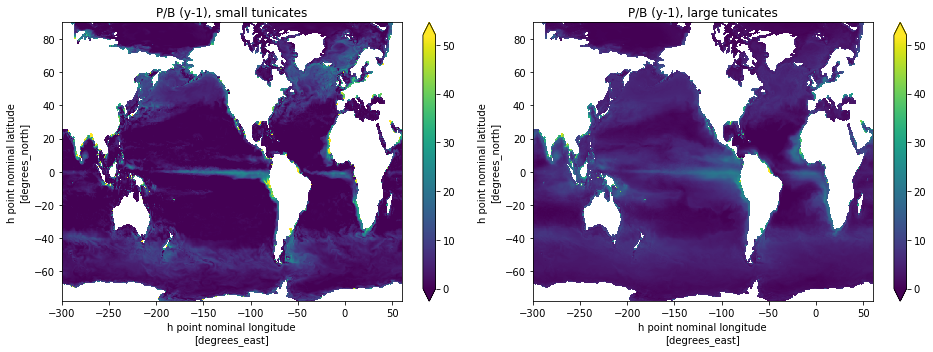

In [259]:
fig=plt.figure(figsize=(13.5,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
(ds.jprod_nsmt_100.mean(dim='time') * seconds_per_year / ds.nsmt_100.mean(dim='time')).plot(vmin=0,vmax=52,cmap='viridis')
plt.title('P/B (y-1), small tunicates')

fig.add_subplot(gs[0,1])
(ds.jprod_nlgt_100.mean(dim='time') * seconds_per_year / ds.nlgt_100.mean(dim='time')).plot(vmin=0,vmax=52,cmap='viridis')
plt.title('P/B (y-1), large tunicates')

plt.tight_layout()
#plt.savefig('plots/'+case.replace('OM4p5_CORE2_IAF_','')+'_PBratios_Tunicates.png', bbox_inches='tight')

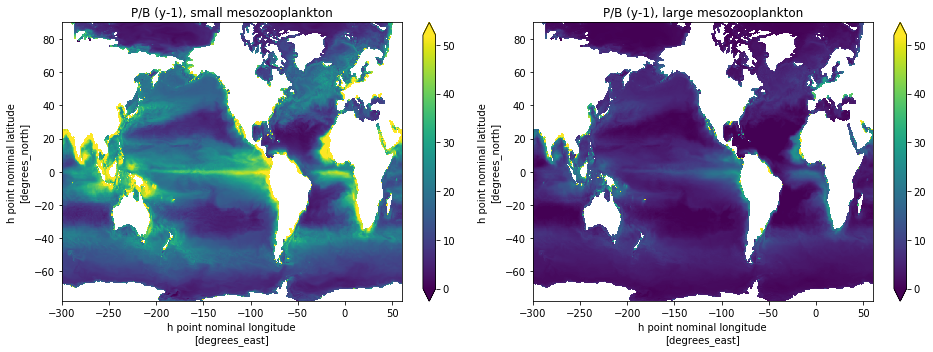

In [260]:
fig=plt.figure(figsize=(13.5,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
(ds.jprod_nmdz_100.mean(dim='time') * seconds_per_year / ds.nmdz_100.mean(dim='time')).plot(vmin=0,vmax=52,cmap='viridis')
plt.title('P/B (y-1), small mesozooplankton')

fig.add_subplot(gs[0,1])
(ds.jprod_nlgz_100.mean(dim='time') * seconds_per_year / ds.nlgz_100.mean(dim='time')).plot(vmin=0,vmax=52,cmap='viridis')
plt.title('P/B (y-1), large mesozooplankton')

plt.tight_layout()
#plt.savefig('plots/'+case.replace('OM4p5_CORE2_IAF_','')+'_PBratios_MesoZ.png', bbox_inches='tight')

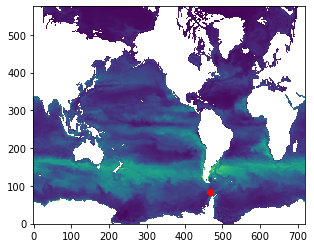

In [261]:
plt.imshow(ds.tunicate_200.isel(time=0).values, origin='bottom')
xh=468
yh=83
plt.scatter(y=yh,x=xh, color='red')

need to make sure there is enough of a dynamic range in salp P/B in Antarctica (should reach > 4 per year during bloom periods)

Text(0.5, 1.0, 'Salp P/B over time in the WAP')

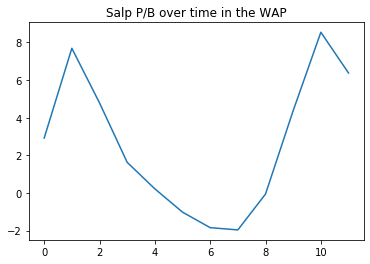

In [262]:
xh=468
yh=83
P=(ds.jprod_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_day * grid.areacello).isel(xh=xh, yh=yh).values
B=((ds.nlgt_100) * grid.areacello).isel(xh=xh, yh=yh).values * cobalt_n_2_c * carbon_molar_mass

#(ds.tunicate_200.isel(xh=xh, yh=yh, time=slice(240-24,240))/ds.tunicate_200.isel(xh=xh, yh=yh, time=slice(240-24,240)).mean()).plot()
#(ds.mesozoo_200.isel(xh=xh, yh=yh, time=slice(240-24,240))/ds.mesozoo_200.isel(xh=xh, yh=yh, time=slice(240-24,240)).mean()).plot()
plt.plot(P*365/B)
plt.title('Salp P/B over time in the WAP')

## Fraction of mortality to consumption vs jelly-falls
#### Luo et al. 2020 model suggests jelly-falls should represent ~22% of production, and ~35% of total mortality. (therefore, predation would be 65% of total mortality)

In [263]:
tun_mort_pred_tot = ((ds.jzloss_nlgt_100 + ds.jhploss_nlgt_100) * cobalt_n_2_c * carbon_molar_mass * 
                     seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
tun_mort_pred_zoo = (ds.jzloss_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
tun_mort_pred_hp = (ds.jhploss_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
salpProd=(ds.jprod_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values

print('Salp prod to predators: ' + str(np.round(tun_mort_pred_tot/salpProd,3)) + ' y-1')
print('Salp mortality to predation: ' + str(np.format_float_scientific(tun_mort_pred_tot,2)) + ' y-1')
print('Salp mortality to zooplankton predation: ' + str(np.format_float_scientific(tun_mort_pred_zoo,2)) + ' y-1')
print('Salp mortality to HP predation: ' + str(np.format_float_scientific(tun_mort_pred_hp,2)) + ' y-1')


Salp prod to predators: 0.581 y-1
Salp mortality to predation: 3.17e+14 y-1
Salp mortality to zooplankton predation: 1.94e+14 y-1
Salp mortality to HP predation: 1.23e+14 y-1


In [264]:
if 'jaggloss_nlgt_100' in ds:
    tun_jellyfalls = (ds.jaggloss_nlgt_100 * cobalt_n_2_c * carbon_molar_mass * seconds_per_year * grid.areacello).sum(dim=['xh','yh']).mean(dim='time').values
    print('Salp mortality via jellyfalls: ' + str(np.format_float_scientific(tun_jellyfalls ,2)) + ' y-1')
    print('Fraction of total salp mortality to jellyfalls: ' + str(np.round(tun_jellyfalls/(tun_mort_pred_tot+tun_jellyfalls),3)) + ' y-1')
    print('Fraction of Salp production lost to jellyfalls: ' + str(np.round(tun_jellyfalls/salpProd,3)) + ' y-1')


Salp mortality via jellyfalls: 1.88e+14 y-1
Fraction of total salp mortality to jellyfalls: 0.373 y-1
Fraction of Salp production lost to jellyfalls: 0.345 y-1


# Biomass vs Chlorophyll validation

In [265]:
from xhistogram.xarray import histogram

In [266]:
xbins=np.arange(-0,0.5,0.01)
ybins=np.arange(0.0,0.1,0.002)

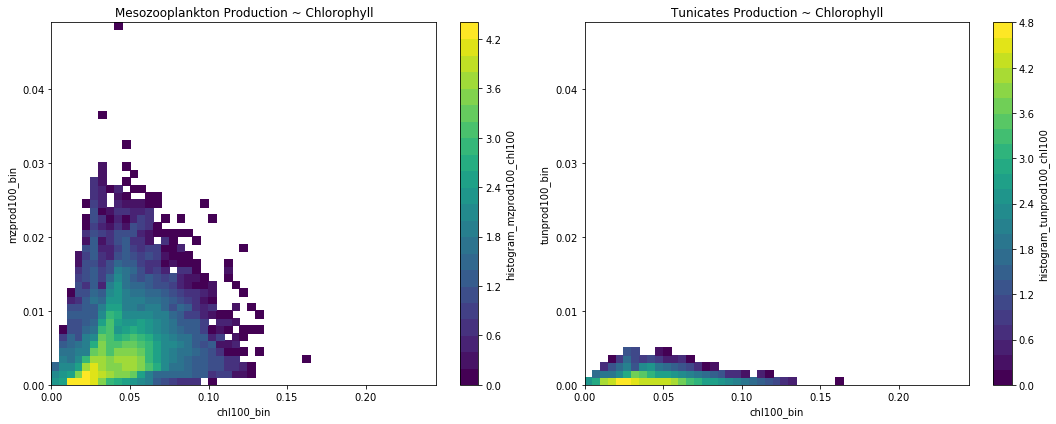

In [267]:
fig=plt.figure(figsize=(15,6))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
y=mzprod100.mean(dim='time') # mol m-2 d-1
x=chl100.mean(dim='time') # g m-2
hT = histogram(y,x, bins=[ybins/2,xbins/2])
np.log10(hT).plot(levels=30)
plt.title('Mesozooplankton Production ~ Chlorophyll')

fig.add_subplot(gs[0,1])
y=tunprod100.mean(dim='time') # mol m-2 d-1
x=chl100.mean(dim='time') # g m-2
hT = histogram(y,x, bins=[ybins/2,xbins/2])
np.log10(hT).plot(levels=30)
plt.title('Tunicates Production ~ Chlorophyll')

plt.tight_layout()

In [268]:
xbins=np.arange(-2,1,0.05)
ybins=np.arange(-1.5,3,0.05)

Text(0.5, 1.0, 'Tunicates Biomass ~ Chlorophyll')

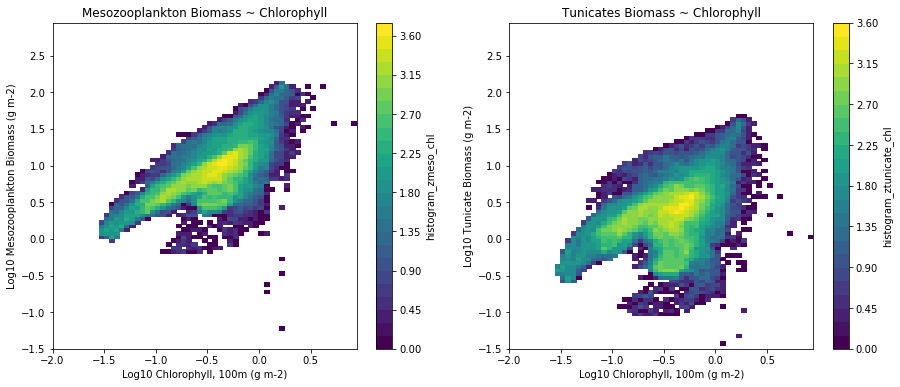

In [269]:
fig=plt.figure(figsize=(15,6))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
y=ds.zmeso.isel(z_l=slice(None,9)).mean(dim=['z_l','time']) * carbon_molar_mass * 1e3 # mg C m-3
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Chlorophyll, 100m (g m-2)')
plt.ylabel('Log10 Mesozooplankton Biomass (g m-2)')
plt.title('Mesozooplankton Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,1])
y=ds.ztunicate.isel(z_l=slice(None,9)).mean(dim=['z_l','time']) * carbon_molar_mass * 1e3 # mg C m-3
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Chlorophyll, 100m (g m-2)')
plt.ylabel('Log10 Tunicate Biomass (g m-2)')
plt.title('Tunicates Biomass ~ Chlorophyll')

#plt.savefig('plots/'+case.replace('OM4p5_CORE2_IAF_','')+'_xhistogram_panel_mesoZ+Tun-Chl.png', bbox_inches='tight')

In [270]:
xbins=np.arange(-2,1,0.02)
ybins=np.arange(-4,2,0.05)

Text(0.5, 1.0, 'Mesozooplankton Biomass ~ Chlorophyll')

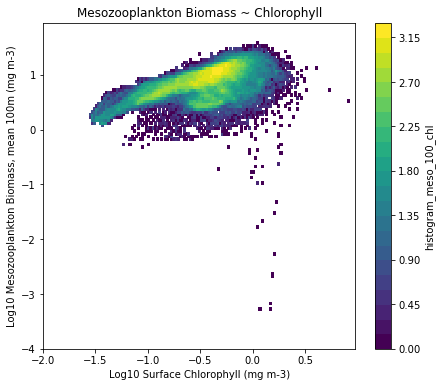

In [271]:
plt.figure(figsize=(7,6))
meso_100 = (ds.nlgz_100 + ds.nmdz_100).rename('meso_100')
y=meso_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Surface Chlorophyll (mg m-3)')
plt.ylabel('Log10 Mesozooplankton Biomass, mean 100m (mg m-3)')
plt.title('Mesozooplankton Biomass ~ Chlorophyll')
#plt.savefig('plots/'+case.replace('OM4p5_CORE2_IAF_','')+'_xhistogram_MesoZ-Chl.png', bbox_inches='tight')

Text(0.5, 1.0, 'Large Zooplankton Biomass ~ Chlorophyll')

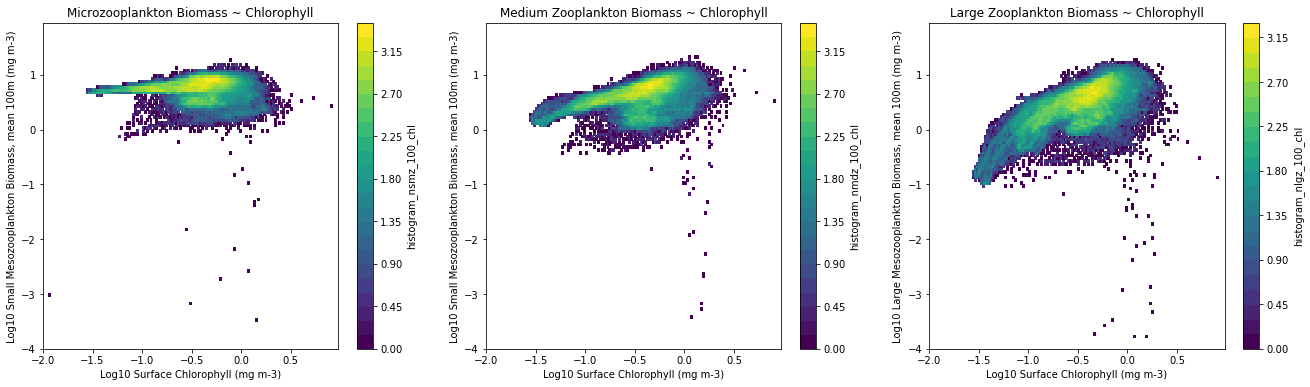

In [272]:
fig=plt.figure(figsize=(22.5,6))
gs=gridspec.GridSpec(1,3)

fig.add_subplot(gs[0,0])
y=(ds.nsmz_100).mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Surface Chlorophyll (mg m-3)')
plt.ylabel('Log10 Small Mesozooplankton Biomass, mean 100m (mg m-3)')
plt.title('Microzooplankton Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,1])
y=(ds.nmdz_100).mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Surface Chlorophyll (mg m-3)')
plt.ylabel('Log10 Small Mesozooplankton Biomass, mean 100m (mg m-3)')
plt.title('Medium Zooplankton Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,2])
y=(ds.nlgz_100).mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Surface Chlorophyll (mg m-3)')
plt.ylabel('Log10 Large Mesozooplankton Biomass, mean 100m (mg m-3)')
plt.title('Large Zooplankton Biomass ~ Chlorophyll')

#plt.savefig('plots/'+case.replace('OM4p5_CORE2_IAF_','')+'_xhistogram_panel_AllZ-Chl.png', bbox_inches='tight')

Text(0.5, 1.0, 'Large Tunicate Biomass ~ Chlorophyll')

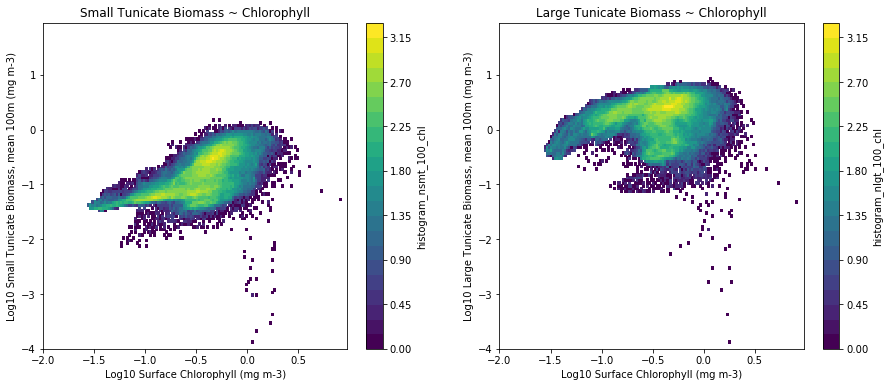

In [273]:
fig=plt.figure(figsize=(15,6))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
y=ds.nsmt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-3
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Surface Chlorophyll (mg m-3)')
plt.ylabel('Log10 Small Tunicate Biomass, mean 100m (mg m-3)')
plt.title('Small Tunicate Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,1])
y=ds.nlgt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
hT = histogram(np.log10(y), np.log10(x), bins=[ybins,xbins])
np.log10(hT).plot(levels=30)
plt.xlabel('Log10 Surface Chlorophyll (mg m-3)')
plt.ylabel('Log10 Large Tunicate Biomass, mean 100m (mg m-3)')
plt.title('Large Tunicate Biomass ~ Chlorophyll')

#plt.savefig('plots/'+case.replace('OM4p5_CORE2_IAF_','')+'_xhistogram_panel_SmT+LgT-Chl.png', bbox_inches='tight')

In [274]:
def abline(slope, intercept, **kwargs):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', **kwargs)

In [275]:
import pandas as pd
dt2=pd.read_csv('dt2cast_ZerosAsMinValue.csv')
dt2

,lon,lat,chl_gs_mean,Appendicularians,Thaliaceans,Copepods,Tunicates
0,-179.5,-59.5,0.390548,NaN,NaN,NaN,NaN
1,-179.5,-58.5,0.327493,NaN,NaN,NaN,NaN
2,-179.5,-57.5,0.284213,NaN,NaN,NaN,NaN
3,-179.5,-56.5,0.280899,NaN,NaN,NaN,NaN
4,-179.5,-55.5,0.263312,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
32780,179.5,58.5,1.285610,NaN,NaN,10.051831,NaN
32781,179.5,59.5,1.756678,NaN,NaN,5.944884,NaN
32782,179.5,60.5,1.761255,NaN,NaN,1.014612,NaN
32783,179.5,61.5,2.025337,NaN,NaN,3.915913,NaN


In [276]:
from scipy import stats
y=np.log10(dt2.Appendicularians)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
app_lm=stats.linregress(x[mask],y[mask])
print(app_lm)

y=np.log10(dt2.Thaliaceans)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
thal_lm=stats.linregress(x[mask],y[mask])
print(thal_lm)

y=np.log10(dt2.Copepods)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
cope_lm=stats.linregress(x[mask],y[mask])
print(cope_lm)

y=np.log10(dt2.Tunicates)
x=np.log10(dt2.chl_gs_mean)
mask = np.isfinite(x) & np.isfinite(y)
tun_lm=stats.linregress(x[mask],y[mask])
print(tun_lm)

LinregressResult(slope=0.6266152195178633, intercept=-1.6974030918795977, rvalue=0.22752515706944576, pvalue=3.926243999688225e-43, stderr=0.04490320441530981, intercept_stderr=0.034734146568002326)
LinregressResult(slope=0.21635635511148538, intercept=-0.5858929175810268, rvalue=0.09236711982299184, pvalue=1.9822115388836256e-09, stderr=0.0359844885002872, intercept_stderr=0.027356390232681722)
LinregressResult(slope=0.5724557321918834, intercept=0.7227737636958664, rvalue=0.5295370789085818, pvalue=0.0, stderr=0.00944849824728197, intercept_stderr=0.0070557836405861244)
LinregressResult(slope=0.23480086380935075, intercept=-0.6467442815327124, rvalue=0.09902521955910874, pvalue=4.723001462614828e-12, stderr=0.03387648840044104, intercept_stderr=0.025169102310368573)


In [277]:
APP_CORR = 10 # REMSEN ET AL. 2004 (tables 4-5) suggest it should range from 5-15x for tunicates
ya=np.log10(dt2.Appendicularians * APP_CORR)
xa=np.log10(dt2.chl_gs_mean)
maska = np.isfinite(xa) & np.isfinite(ya)
app_lm_corr=stats.linregress(xa[maska],ya[maska])

THAL_CORR = 10 # REMSEN ET AL. 2004 (tables 4-5) suggest it should range from 5-15x for tunicates
yt=np.log10(dt2.Thaliaceans * THAL_CORR)
xt=np.log10(dt2.chl_gs_mean)
maskt = np.isfinite(xt) & np.isfinite(yt)
thal_lm_corr=stats.linregress(xt[maskt],yt[maskt])
thal_lm_corr

#LOWER BOUND
APP_CORR_LOW = 5
ya=np.log10(dt2.Appendicularians * APP_CORR_LOW)
mask = np.isfinite(xa) & np.isfinite(ya)
app_lm_corrlow=stats.linregress(xa[maska],ya[maska])
APP_CORR_HIGH = 15
ya=np.log10(dt2.Appendicularians * APP_CORR_HIGH)
mask = np.isfinite(xa) & np.isfinite(ya)
app_lm_corrhigh=stats.linregress(xa[maska],ya[maska])

THAL_CORR_LOW = 5
yt=np.log10(dt2.Thaliaceans * THAL_CORR_LOW)
maskt = np.isfinite(xt) & np.isfinite(yt)
thal_lm_corrlow=stats.linregress(xt[maskt],yt[maskt])
THAL_CORR_HIGH = 15
yt=np.log10(dt2.Thaliaceans * THAL_CORR_HIGH)
maskt = np.isfinite(xt) & np.isfinite(yt)
thal_lm_corrhigh=stats.linregress(xt[maskt],yt[maskt])

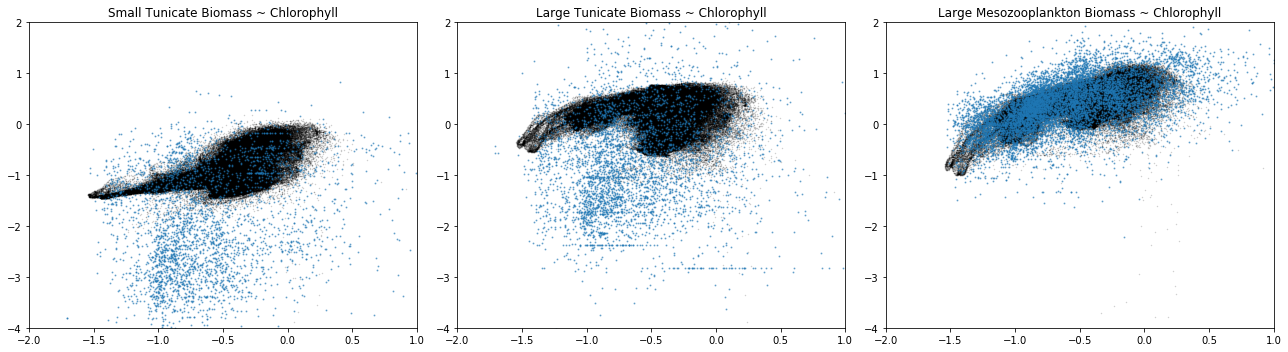

In [278]:
fig=plt.figure(figsize=(18,5))
gs=gridspec.GridSpec(1,3)

fig.add_subplot(gs[0,0])
y=ds.nsmt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-3
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.2,s=0.2, c='black')
yd=dt2.Appendicularians
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd), alpha=0.5,s=1, c='C0')
plt.ylim(-4,2)
plt.xlim(-2,1)
plt.title('Small Tunicate Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,1])
y=ds.nlgt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.2,s=0.2, c='black')
yd=dt2.Thaliaceans
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd), alpha=0.5,s=1, c='C0')
plt.ylim(-4,2)
plt.xlim(-2,1)
plt.title('Large Tunicate Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,2])
y=(ds.nlgz_100).mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.2,s=0.2, c='black')
yd=dt2.Copepods
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd), alpha=0.5,s=1, c='C0')
plt.ylim(-4,2)
plt.xlim(-2,1)
plt.title('Large Mesozooplankton Biomass ~ Chlorophyll')


plt.tight_layout()

## Regrid onto observational points

In [279]:
var_keep = ['nsmt_100', 'nlgt_100', 'chl', 'xh', 'yh']
do = ds.drop([v for v in ds.variables if v not in var_keep])
do = do.rename({'xh': 'lon', 'yh': 'lat'})
do

<xarray.Dataset>
Dimensions:   (lat: 576, lon: 720, time: 12, z_l: 35)
Coordinates:
  * lon       (lon) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * lat       (lat) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
Dimensions without coordinates: time, z_l
Data variables:
    chl       (time, z_l, lat, lon) float32 dask.array<chunksize=(12, 35, 576, 720), meta=np.ndarray>
    nsmt_100  (time, lat, lon) float32 dask.array<chunksize=(12, 576, 720), meta=np.ndarray>
    nlgt_100  (time, lat, lon) float32 dask.array<chunksize=(12, 576, 720), meta=np.ndarray>
Attributes:
    filename:          19520101.ocean_cobalt_omip_tracers_month_z.nc
    title:             OM4p5_CORE2_IAF_gzCOBALT-013022
    associated_files:  areacello: 19520101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A

In [280]:
apps=dt2[['lon','lat','chl_gs_mean','Appendicularians']].dropna()
thals=dt2[['lon','lat','chl_gs_mean','Thaliaceans']].dropna()

In [281]:
apps_locs=xr.Dataset()
apps_locs['lon']=xr.DataArray(data=apps.lon.values, dims=('location'))
apps_locs['lat']=xr.DataArray(data=apps.lat.values, dims=('location'))

thals_locs=xr.Dataset()
thals_locs['lon']=xr.DataArray(data=thals.lon.values, dims=('location'))
thals_locs['lat']=xr.DataArray(data=thals.lat.values, dims=('location'))

thals_locs

<xarray.Dataset>
Dimensions:  (location: 4203)
Dimensions without coordinates: location
Data variables:
    lon      (location) float64 -179.5 -179.5 -179.5 ... 179.5 179.5 179.5
    lat      (location) float64 1.5 30.5 35.5 37.5 38.5 ... 50.5 52.5 53.5 57.5

In [282]:
import xesmf as xe

regridder_apps = xe.Regridder(do, apps_locs, 'bilinear', locstream_out=True, reuse_weights=True)
regridder_thals = xe.Regridder(do, thals_locs, 'bilinear', locstream_out=True, reuse_weights=True)

Reuse existing file: bilinear_576x720_1x3569.nc
Reuse existing file: bilinear_576x720_1x4203.nc


In [283]:
ds_apps_rg = regridder_apps(do)
ds_thals_rg = regridder_thals(do)

using dimensions ('lat', 'lon') from data variable chl as the horizontal dimensions for this dataset.
using dimensions ('lat', 'lon') from data variable chl as the horizontal dimensions for this dataset.


In [284]:
y=np.log10(ds_apps_rg.nsmt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100) # mg C m-3
x=np.log10(ds_apps_rg.chl.isel(z_l=0).mean(dim='time') * 1e6) # mg m-3
mask = np.isfinite(x) & np.isfinite(y)
model_app_lm=stats.linregress(x[mask],y[mask])
print(model_app_lm)

y=np.log10(ds_thals_rg.nlgt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100) # mg C m-2
x=np.log10(ds_thals_rg.chl.isel(z_l=0).mean(dim='time') * 1e6) # mg m-3
mask = np.isfinite(x) & np.isfinite(y)
model_thal_lm=stats.linregress(x[mask],y[mask])
print(model_thal_lm)

LinregressResult(slope=0.8332367280911754, intercept=-0.49117898937636906, rvalue=0.7562088162857722, pvalue=0.0, stderr=0.012314118725893136, intercept_stderr=0.0068580589508526815)
LinregressResult(slope=0.363154526546163, intercept=0.5948269321945578, rvalue=0.615759693348192, pvalue=0.0, stderr=0.007263554129775122, intercept_stderr=0.004140657055233338)


In [285]:
print('Slope of SmT vs Chl line (log-log): ' + str(np.round(model_app_lm.slope,3)))
print('Slope of LgT vs Chl line (log-log): ' + str(np.round(model_thal_lm.slope,3)))

Slope of SmT vs Chl line (log-log): 0.833
Slope of LgT vs Chl line (log-log): 0.363


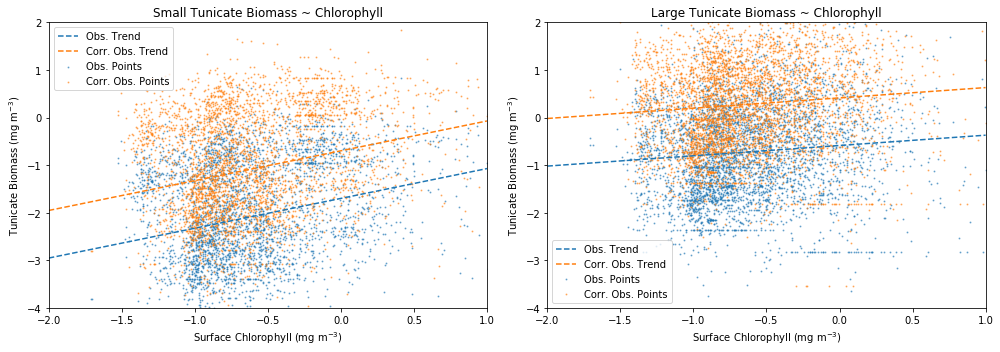

In [286]:
fig=plt.figure(figsize=(14,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
yd=dt2.Appendicularians
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd), alpha=0.5,s=1, c='C0')
plt.scatter(x=np.log10(xd),y=np.log10(yd*APP_CORR), alpha=0.5,s=1, c='C1')
#plt.scatter(x=np.log10(xd),y=np.log10(yd*3), alpha=0.5,s=1, c='y')
plt.ylim(-4,2)
plt.xlim(-2,1)
abline(slope=app_lm.slope, intercept=app_lm.intercept)
abline(slope=app_lm_corr.slope, intercept=app_lm_corr.intercept)
plt.legend(['Obs. Trend', 'Corr. Obs. Trend','Obs. Points','Corr. Obs. Points'])
plt.xlabel('Surface Chlorophyll (mg m$^{-3}$)')
plt.ylabel('Tunicate Biomass (mg m$^{-3}$)')
plt.title('Small Tunicate Biomass ~ Chlorophyll')

fig.add_subplot(gs[0,1])
yd=dt2.Thaliaceans
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd), alpha=0.5,s=1, c='C0')
plt.scatter(x=np.log10(xd),y=np.log10(yd*THAL_CORR), alpha=0.5,s=1, c='C1')
plt.ylim(-4,2)
plt.xlim(-2,1)
abline(slope=thal_lm.slope, intercept=thal_lm.intercept)
abline(slope=thal_lm_corr.slope, intercept=thal_lm_corr.intercept)
plt.legend(['Obs. Trend', 'Corr. Obs. Trend','Obs. Points','Corr. Obs. Points'])
plt.xlabel('Surface Chlorophyll (mg m$^{-3}$)')
plt.ylabel('Tunicate Biomass (mg m$^{-3}$)')
plt.title('Large Tunicate Biomass ~ Chlorophyll')

plt.tight_layout()

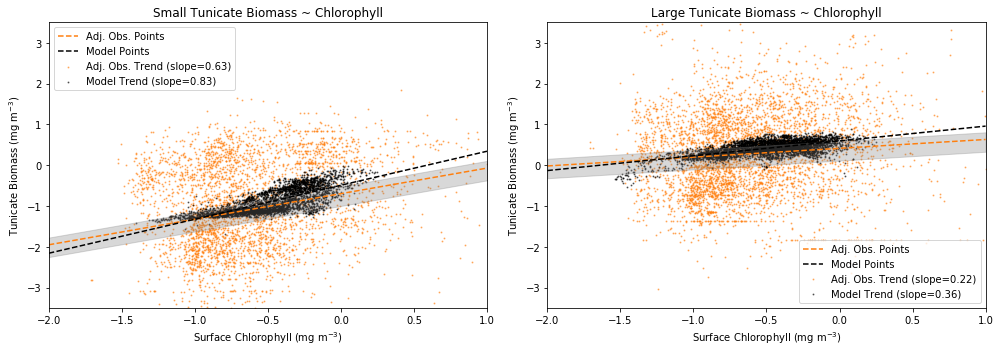

In [287]:
fig=plt.figure(figsize=(14,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
plt.ylim(-3.5,3.5)
plt.xlim(-2,1)
y=ds_apps_rg.nsmt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-3
x=ds_apps_rg.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
yd=dt2.Appendicularians
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd*APP_CORR), alpha=0.5,s=1, c='C1')
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.5,s=1, c='black')
#plt.scatter(x=np.log10(xd),y=np.log10(yd*3), alpha=0.5,s=1, c='y')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
plt.fill_between(x_vals, app_lm_corrlow.intercept + app_lm_corrlow.slope * x_vals, 
                 app_lm_corrhigh.intercept + app_lm_corrhigh.slope * x_vals,
                 alpha=0.30, color='grey', interpolate=True)
abline(slope=app_lm_corr.slope, intercept=app_lm_corr.intercept,c='C1')
abline(slope=model_app_lm.slope, intercept=model_app_lm.intercept, c='black')

plt.legend(['Adj. Obs. Points','Model Points',
            'Adj. Obs. Trend (slope='+str(np.round(app_lm_corr.slope,2))+')',
            'Model Trend (slope='+str(np.round(model_app_lm.slope,2))+')'])
plt.xlabel('Surface Chlorophyll (mg m$^{-3}$)')
plt.ylabel('Tunicate Biomass (mg m$^{-3}$)')
plt.title('Small Tunicate Biomass ~ Chlorophyll')


fig.add_subplot(gs[0,1])
plt.ylim(-3.5,3.5)
plt.xlim(-2,1)
y=ds_thals_rg.nlgt_100.mean(dim='time') * carbon_molar_mass * cobalt_n_2_c * 1e3 / 100 # mg C m-2
x=ds_thals_rg.chl.isel(z_l=0).mean(dim='time') * 1e6 # mg m-3
yd=dt2.Thaliaceans
xd=dt2.chl_gs_mean
plt.scatter(x=np.log10(xd),y=np.log10(yd*THAL_CORR), alpha=0.5,s=1, c='C1')
plt.scatter(x=np.log10(x),y=np.log10(y), alpha=0.5,s=1, c='black')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
plt.fill_between(x_vals, thal_lm_corrlow.intercept + thal_lm_corrlow.slope * x_vals, 
                 thal_lm_corrhigh.intercept + thal_lm_corrhigh.slope * x_vals,
                 alpha=0.30, color='grey', interpolate=True)
abline(slope=thal_lm_corr.slope, intercept=thal_lm_corr.intercept,c='C1')
abline(slope=model_thal_lm.slope, intercept=model_thal_lm.intercept,c='black')
plt.legend(['Adj. Obs. Points','Model Points',
            'Adj. Obs. Trend (slope='+str(np.round(thal_lm_corr.slope,2))+')',
            'Model Trend (slope='+str(np.round(model_thal_lm.slope,2))+')'])
plt.xlabel('Surface Chlorophyll (mg m$^{-3}$)')
plt.ylabel('Tunicate Biomass (mg m$^{-3}$)')
plt.title('Large Tunicate Biomass ~ Chlorophyll')

plt.tight_layout()
plt.savefig('plots/'+case.replace('OM4p5_CORE2_IAF_','')+'_regrid_onto_obs_SmT+LgT-Chl.png', bbox_inches='tight')

Gross Growth Efficiency & Assimilation Efficiency
-------------

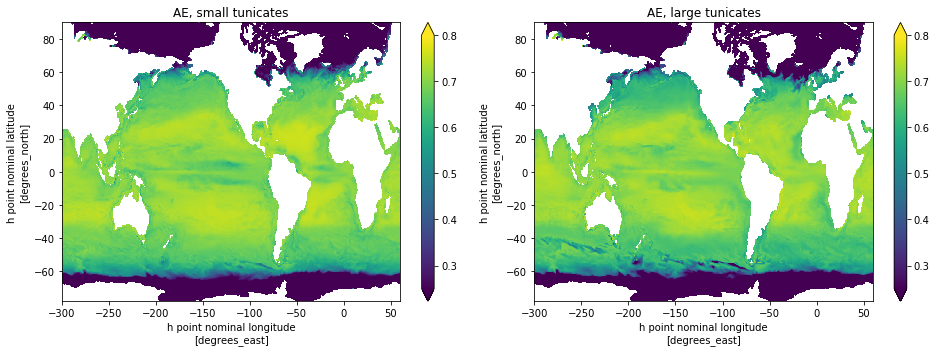

In [288]:
AE_smt = 1-(ds.jprod_ndet_nsmt_100/ds.jingest_n_nsmt_100) # sort of AE, because when resp > prod, then it dies
AE_lgt = 1-(ds.jprod_ndet_nlgt_100/ds.jingest_n_nlgt_100)

fig=plt.figure(figsize=(13.5,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
(AE_smt.where(ds.jingest_n_nsmt_100 > 0)).mean(dim='time').plot(vmin=0.25,vmax=0.8)
plt.title('AE, small tunicates')

fig.add_subplot(gs[0,1])
(AE_lgt.where(ds.jingest_n_nlgt_100 > 0)).mean(dim='time').plot(vmin=0.25,vmax=0.8)
plt.title('AE, large tunicates')

plt.tight_layout()

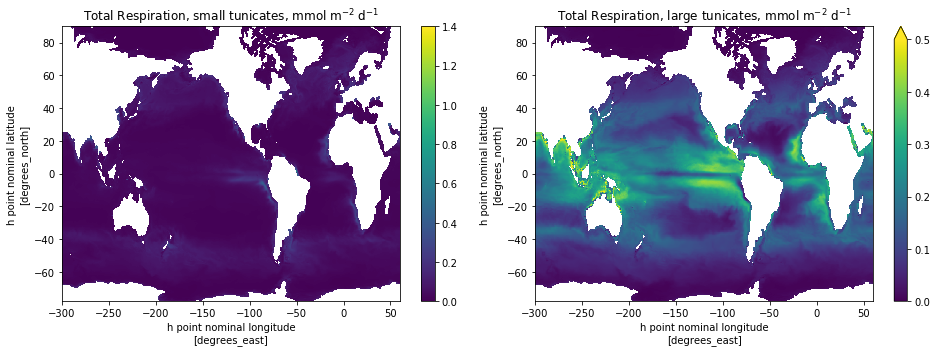

In [289]:
# TOTAL RESPIRATION

resp_smt = (ds.jingest_n_nsmt_100.mean(dim='time') - ds.jprod_ndet_nsmt_100.mean(dim='time') - ds.jprod_nsmt_100.mean(dim='time')) * 1e3 * seconds_per_day # mmol m-2 d-1
resp_lgt = (ds.jingest_n_nlgt_100.mean(dim='time') - ds.jprod_ndet_nlgt_100.mean(dim='time') - ds.jprod_nlgt_100.mean(dim='time')) * 1e3 * seconds_per_day # mmol m-2 d-1

fig=plt.figure(figsize=(13.5,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
resp_smt.plot(vmin=0,vmax=1.4)
plt.title('Total Respiration, small tunicates, mmol m$^{-2}$ d$^{-1}$')

fig.add_subplot(gs[0,1])
resp_lgt.plot(vmin=0,vmax=0.5)
plt.title('Total Respiration, large tunicates, mmol m$^{-2}$ d$^{-1}$')

plt.tight_layout()

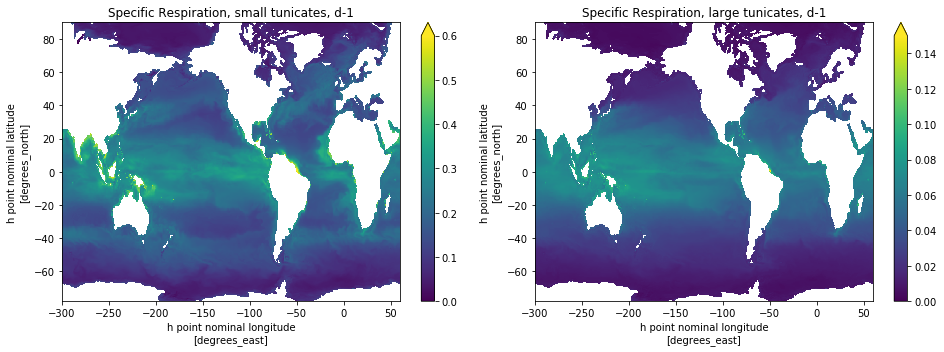

In [290]:
# SPECIFIC RESPIRATION

resp_smt = (ds.jingest_n_nsmt_100.mean(dim='time') - ds.jprod_ndet_nsmt_100.mean(dim='time') - ds.jprod_nsmt_100.mean(dim='time')) / ds.nsmt_100.mean(dim='time') * seconds_per_day # mol m-2 d-1
resp_lgt = (ds.jingest_n_nlgt_100.mean(dim='time') - ds.jprod_ndet_nlgt_100.mean(dim='time') - ds.jprod_nlgt_100.mean(dim='time')) / ds.nlgt_100.mean(dim='time') * seconds_per_day #mol m-2 d-1

fig=plt.figure(figsize=(13.5,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
resp_smt.plot(vmin=0,vmax=0.6)
plt.title('Specific Respiration, small tunicates, d-1')

fig.add_subplot(gs[0,1])
resp_lgt.plot(vmin=0,vmax=0.15)
plt.title('Specific Respiration, large tunicates, d-1')

plt.tight_layout()

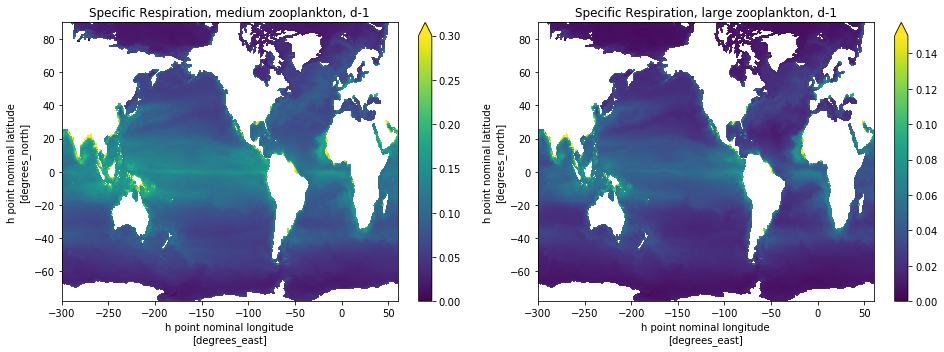

In [291]:
# MESOZOOPLANKTON RESPIRATION

resp_mdz = (0.7 * ds.jingest_n_nmdz_100.mean(dim='time') - ds.jprod_nmdz_100.mean(dim='time')) / ds.nmdz_100.mean(dim='time') * seconds_per_day # mol m-2 d-1
resp_lgz = (0.7 * ds.jingest_n_nlgz_100.mean(dim='time') - ds.jprod_nlgz_100.mean(dim='time')) / ds.nlgz_100.mean(dim='time') * seconds_per_day #mol m-2 d-1

fig=plt.figure(figsize=(13.5,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
resp_mdz.plot(vmin=0,vmax=0.3)
plt.title('Specific Respiration, medium zooplankton, d-1')

fig.add_subplot(gs[0,1])
resp_lgz.plot(vmin=0,vmax=0.15)
plt.title('Specific Respiration, large zooplankton, d-1')

plt.tight_layout()

In [292]:
ds.nsmt_100

<xarray.DataArray 'nsmt_100' (time: 12, yh: 576, xh: 720)>
dask.array<open_dataset-4d4756749436a10e7b964579a97eabb3nsmt_100, shape=(12, 576, 720), dtype=float32, chunksize=(12, 576, 720), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) object 1952-01-16 12:00:00 ... 1952-12-16 12:00:00
Attributes:
    long_name:      Small tunicate nitrogen biomass in upper 100m
    units:          mol m-2
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT

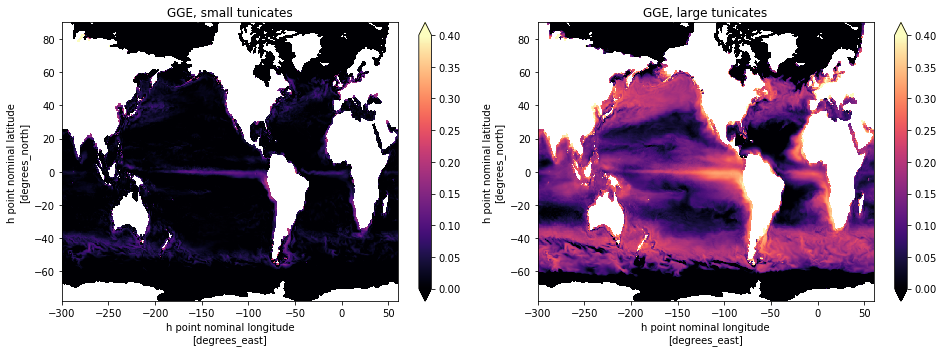

In [293]:
fig=plt.figure(figsize=(13.5,5))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
(ds.jprod_nsmt_100 / ds.jingest_n_nsmt_100).mean(dim='time').plot(vmin=0,vmax=0.4, cmap='magma')
plt.title('GGE, small tunicates')

fig.add_subplot(gs[0,1])
(ds.jprod_nlgt_100 / ds.jingest_n_nlgt_100).mean(dim='time').plot(vmin=0,vmax=0.4, cmap='magma')
plt.title('GGE, large tunicates')

plt.tight_layout()

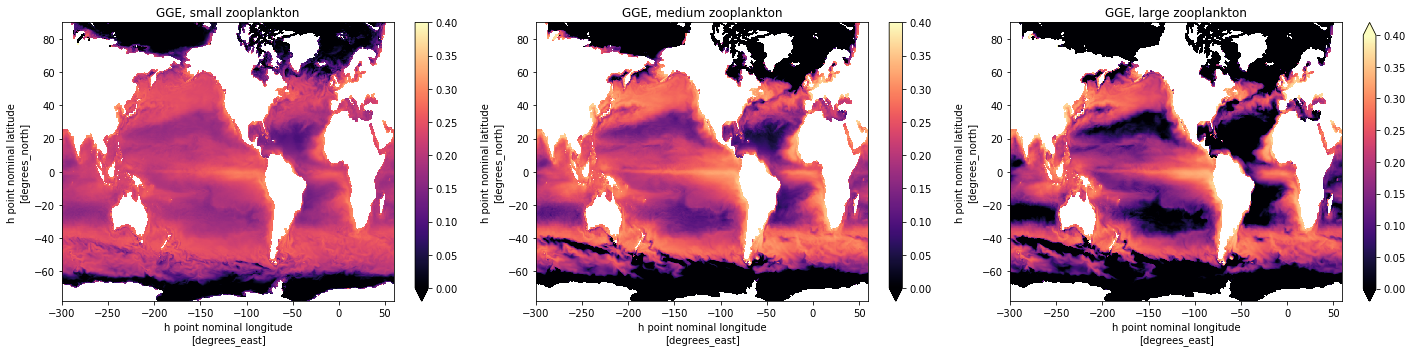

In [294]:
fig=plt.figure(figsize=(20,5))
gs=gridspec.GridSpec(1,3)

fig.add_subplot(gs[0,0])
(ds.jprod_nsmz_100 / ds.jingest_n_nsmz_100).mean(dim='time').plot(vmin=0,vmax=0.4, cmap='magma')
plt.title('GGE, small zooplankton')

fig.add_subplot(gs[0,1])
(ds.jprod_nmdz_100 / ds.jingest_n_nmdz_100).mean(dim='time').plot(vmin=0,vmax=0.4, cmap='magma')
plt.title('GGE, medium zooplankton')

fig.add_subplot(gs[0,2])
(ds.jprod_nlgz_100 / ds.jingest_n_nlgz_100).mean(dim='time').plot(vmin=0,vmax=0.4, cmap='magma')
plt.title('GGE, large zooplankton')

plt.tight_layout()

In [295]:
from pywaffle import Waffle
import seaborn as sns

# Budgets

In [296]:
#buptake100 = (ds.juptake_ldon_nbact_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smzingest100 = (ds.jingest_n_nsmz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
mdzingest100 = (ds.jingest_n_nmdz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgzingest100 = (ds.jingest_n_nlgz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smtingest100 = (ds.jingest_n_nsmt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgtingest100 = (ds.jingest_n_nlgt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass

divisor=1e14
ingest_data={
     'Microzooplankton': smzingest100.values/divisor,
     'Small mesozooplankton': mdzingest100.values/divisor,
     'Large mesozooplankton': lgzingest100.values/divisor,
     'Small tunicates': smtingest100.values/divisor,
     'Large tunicates': lgtingest100.values/divisor}

print(ingest_data)

{'Microzooplankton': 362.32391353696255, 'Small mesozooplankton': 136.49657322274817, 'Large mesozooplankton': 37.9242793664512, 'Small tunicates': 6.71647388401664, 'Large tunicates': 29.62411011178496}


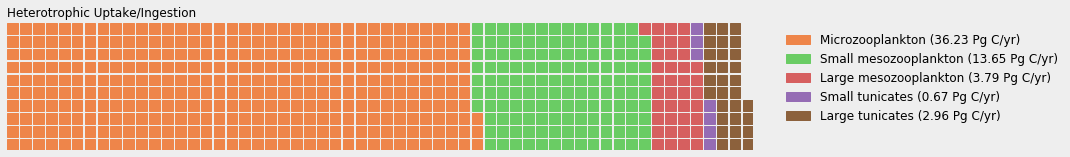

In [297]:
fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(15,10),
    rows=10,
    values=ingest_data, 
    colors=sns.color_palette('muted',len(ingest_data)+1).as_hex()[1:],
    title={'label': 'Heterotrophic Uptake/Ingestion', 'loc': 'left'},
    labels=["{0} ({1} Pg C/yr)".format(k, np.round(v/10.,2)) for k, v in ingest_data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.03,1), 'framealpha': 0, 'fontsize':12}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')

In [298]:
#bprod100 = (ds.jprod_nbact_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smzprod100 = (ds.jprod_nsmz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
mdzprod100 = (ds.jprod_nmdz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgzprod100 = (ds.jprod_nlgz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smtprod100 = (ds.jprod_nsmt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgtprod100 = (ds.jprod_nlgt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass

divisor=1e14
zprod_data={'Microzooplankton': smzprod100.values/divisor,
     'Small mesozooplankton': mdzprod100.values/divisor,
     'Large mesozooplankton': lgzprod100.values/divisor,
     'Small tunicates': smtprod100.values/divisor,
     'Large tunicates': lgtprod100.values/divisor}

print(zprod_data)

{'Microzooplankton': 84.1681788207104, 'Small mesozooplankton': 37.1919471771648, 'Large mesozooplankton': 10.15835195867136, 'Small tunicates': 0.36514146811904, 'Large tunicates': 5.46295781523456}


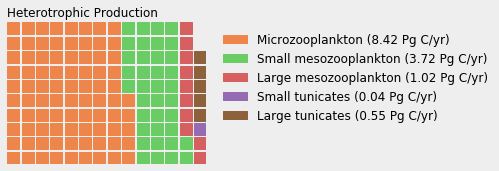

In [299]:
fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(7,5),
    rows=10,
    values=zprod_data, 
    colors=sns.color_palette('muted',len(zprod_data)+1).as_hex()[1:],
    title={'label': 'Heterotrophic Production', 'loc': 'left'},
    labels=["{0} ({1} Pg C/yr)".format(k, np.round(v/10,2)) for k, v in zprod_data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.03,1), 'framealpha': 0, 'fontsize':12}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')

In [300]:
bdetprod100 = 0
smzdetprod100 = 0
mdzdetprod100 = (ds.jprod_ndet_nmdz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgzdetprod100 = (ds.jprod_ndet_nlgz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smtdetprod100 = (ds.jprod_ndet_nsmt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgtdetprod100 = (ds.jprod_ndet_nlgt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
hpdetprod100 = (ds.jprod_ndet_hp_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
agglosssmp100 = (ds.jaggloss_nsmp_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
agglosslgp100 = (ds.jaggloss_nlgp_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass


divisor=1e14
zdetprod_data={'Small mesozooplankton': mdzdetprod100.values/divisor,
              'Large mesozooplankton': lgzdetprod100.values/divisor,
              'Small tunicates': smtdetprod100.values/divisor,
              'Large tunicates': lgtdetprod100.values/divisor,
              'Higher Predators': hpdetprod100.values/divisor,
              'Small phytoplankton':agglosssmp100.values/divisor,
              'Large phytoplankton':agglosslgp100.values/divisor}

print(zdetprod_data)

{'Small mesozooplankton': 27.75191507697664, 'Large mesozooplankton': 11.6630709338112, 'Small tunicates': 2.18934095642624, 'Large tunicates': 9.4454350348288, 'Higher Predators': 9.27530466934784, 'Small phytoplankton': 3.61561889701888, 'Large phytoplankton': 18.70926543060992}


In [301]:
idx=[2,3,4,5,6,7,8]

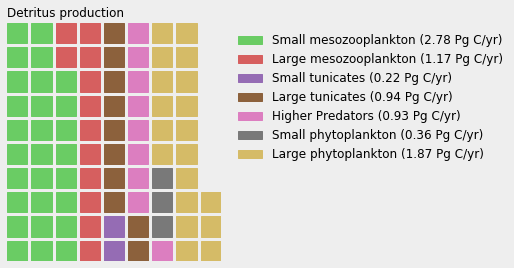

In [302]:
fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(6,5),
    rows=10,
    values=zdetprod_data, 
    colors=[sns.color_palette('muted',9).as_hex()[i] for i in idx],
    title={'label': 'Detritus production', 'loc': 'left'},
    labels=["{0} ({1} Pg C/yr)".format(k, np.round(v/10,2)) for k, v in zdetprod_data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.03,1), 'framealpha': 0, 'fontsize':12}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')

In [303]:
diazprod100 = (ds.jprod_ndi_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smpprod100 = (ds.jprod_nsmp_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgpprod100 = (ds.jprod_nlgp_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass

divisor=1e14
pprod_data={'Diazotrophs': diazprod100.values/divisor,
     'Small Phytoplankton': smpprod100.values/divisor,
     'Large Phytoplankton': lgpprod100.values/divisor}

print(pprod_data)

{'Diazotrophs': 4.63243227168768, 'Small Phytoplankton': 470.14481548541954, 'Large Phytoplankton': 117.37411180560385}


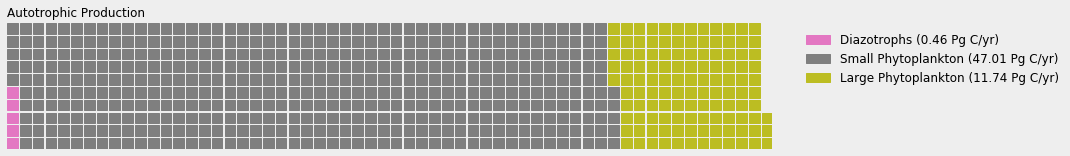

In [304]:
fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(15,10),
    rows=10,
    values=pprod_data, 
    colors=sns.color_palette().as_hex()[6:9],
    title={'label': 'Autotrophic Production', 'loc': 'left'},
    labels=["{0} ({1} Pg C/yr)".format(k, np.round(v/10,2)) for k, v in pprod_data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.03,1), 'framealpha': 0, 'fontsize':12}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')